In [ ]:
  import pandas as pd

In [ ]:
swapData = pd.read_csv("uniswap_eth_swap.csv")
swapData

,pool,block_number,block_hash,block_time,log_index,tx_hash,sender,recipient,amount0,amount1,sqrt_price_x96,liquidity,price,tick,gasUsed,gasPrice
0,mypool,15866980,0x2e0c6b3ba916b3ee018cd912d8712a251c08cbd77a20...,1667206523,129,0x2e0c6b3ba916b3ee018cd912d8712a251c08cbd77a20...,0xa01a6120b3109596d9446976809e4289b9f18d6b,recipient,-157.930542,0.099751,1991658078274610112530375503755667,0,1582.448566,202653,484764,7491990241
1,mypool,15866980,0x4e82be02c98431c01080a230bf08122332283ce2480d...,1667206523,108,0x4e82be02c98431c01080a230bf08122332283ce2480d...,0xe32d02fd54e53a4d3f4db2508eaa15540abe8889,recipient,-5000.000000,3.158086,1991658180789339572875186646066431,0,1582.448403,202653,316766,7491990241
2,mypool,15866980,0xbcff310eeb2a3b9034168ed1897d0388434b05c6968a...,1667206523,9,0xbcff310eeb2a3b9034168ed1897d0388434b05c6968a...,0x45c5232b76ed9c6a70ec842a1e79d2d00eb58827,recipient,-570164.741009,360.193377,1991661426358593255946083208357203,0,1582.443246,202653,144288,1015016306910
3,mypool,15866980,0xd80c735c07543ff5d748bffb7f163c585e332cafaa48...,1667206523,3,0xd80c735c07543ff5d748bffb7f163c585e332cafaa48...,0x000eedbdbe50e189baad667c6c497a46b225930d,recipient,237.159656,-0.150000,1992031597579723776701129860756931,0,1581.855182,202656,293253,6600000000
4,mypool,15866981,0x36c5b52aa0a0c4400f6aecdd765e5942ebec3cdc5bc7...,1667206535,2,0x36c5b52aa0a0c4400f6aecdd765e5942ebec3cdc5bc7...,0x474a6faf2178982be06028f0e1256af98910d9be,recipient,-468940.005356,296.144798,1991353729864409771232049663188473,0,1582.932310,202649,194678,527656232323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9878,mypool,15874417,0x22c3a8365a0bfa7e7ff84853db4b695e12265a35da6b...,1667296463,192,0x22c3a8365a0bfa7e7ff84853db4b695e12265a35da6b...,0x8b9c142e8231f769f9f96cdad567d4db7937f0f7,recipient,-2000.000000,1.250357,1981479607611878033221561673766296,0,1598.747775,202550,552100,10615522670
9879,mypool,15874417,0x3e509e3e8f9b1f5798fda2fff5e95ea43c5b188ddfa9...,1667296463,213,0x3e509e3e8f9b1f5798fda2fff5e95ea43c5b188ddfa9...,0x443dff63c2634ac5ef5aa5bfbd194a503c734de4,recipient,-58.174662,0.036369,1981479442569409924537669380363194,0,1598.748042,202550,5807040,10615522670
9880,mypool,15874419,0x2f9dc831717a27b72a85a9868acf734dede7afd9ec24...,1667296487,86,0x2f9dc831717a27b72a85a9868acf734dede7afd9ec24...,0xfb0e5a62caa5cbd83e4f997d98f7f04bd1b88746,recipient,5417.992710,-3.390619,1981494821310958383291949675545184,0,1598.723225,202550,322951,10430683596
9881,mypool,15874421,0x5e37b5b8a890ad57a2235008124a962ed51f99a582d0...,1667296511,281,0x5e37b5b8a890ad57a2235008124a962ed51f99a582d0...,0x9250f8149067fc068189f95e92f0eea9673f62d0,recipient,846.898620,-0.530000,1981497225218195272067690306841244,0,1598.719346,202550,173224,10577900568


In [ ]:
swapData.columns

Index(['pool', 'block_number', 'block_hash', 'block_time', 'log_index',
       'tx_hash', 'sender', 'recipient', 'amount0', 'amount1',
       'sqrt_price_x96', 'liquidity', 'price', 'tick', 'gasUsed', 'gasPrice'],
      dtype='object')

In [ ]:
# remove duplicated rows, if there's any only for Transactions:
swapData = swapData.drop_duplicates(subset=["tx_hash"],keep="first")

# sort value by block_number first, then log_index
swapData = swapData.sort_values(['block_number', 'log_index'], ascending = [True, True])

In [ ]:
# only look at transactions that have swapped non-zero tokens
validSwaps = swapData[abs(swapData['amount0'])>0]
validSwaps = validSwaps.reset_index(drop=True)
validSwaps
#swapData['tx_hash']

,pool,block_number,block_hash,block_time,log_index,tx_hash,sender,recipient,amount0,amount1,sqrt_price_x96,liquidity,price,tick,gasUsed,gasPrice
0,mypool,15866980,0xd80c735c07543ff5d748bffb7f163c585e332cafaa48...,1667206523,3,0xd80c735c07543ff5d748bffb7f163c585e332cafaa48...,0x000eedbdbe50e189baad667c6c497a46b225930d,recipient,237.159656,-0.150000,1992031597579723776701129860756931,0,1581.855182,202656,293253,6600000000
1,mypool,15866980,0xbcff310eeb2a3b9034168ed1897d0388434b05c6968a...,1667206523,9,0xbcff310eeb2a3b9034168ed1897d0388434b05c6968a...,0x45c5232b76ed9c6a70ec842a1e79d2d00eb58827,recipient,-570164.741009,360.193377,1991661426358593255946083208357203,0,1582.443246,202653,144288,1015016306910
2,mypool,15866980,0x4e82be02c98431c01080a230bf08122332283ce2480d...,1667206523,108,0x4e82be02c98431c01080a230bf08122332283ce2480d...,0xe32d02fd54e53a4d3f4db2508eaa15540abe8889,recipient,-5000.000000,3.158086,1991658180789339572875186646066431,0,1582.448403,202653,316766,7491990241
3,mypool,15866980,0x2e0c6b3ba916b3ee018cd912d8712a251c08cbd77a20...,1667206523,129,0x2e0c6b3ba916b3ee018cd912d8712a251c08cbd77a20...,0xa01a6120b3109596d9446976809e4289b9f18d6b,recipient,-157.930542,0.099751,1991658078274610112530375503755667,0,1582.448566,202653,484764,7491990241
4,mypool,15866981,0x36c5b52aa0a0c4400f6aecdd765e5942ebec3cdc5bc7...,1667206535,2,0x36c5b52aa0a0c4400f6aecdd765e5942ebec3cdc5bc7...,0x474a6faf2178982be06028f0e1256af98910d9be,recipient,-468940.005356,296.144798,1991353729864409771232049663188473,0,1582.932310,202649,194678,527656232323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9863,mypool,15874417,0x22c3a8365a0bfa7e7ff84853db4b695e12265a35da6b...,1667296463,192,0x22c3a8365a0bfa7e7ff84853db4b695e12265a35da6b...,0x8b9c142e8231f769f9f96cdad567d4db7937f0f7,recipient,-2000.000000,1.250357,1981479607611878033221561673766296,0,1598.747775,202550,552100,10615522670
9864,mypool,15874417,0x3e509e3e8f9b1f5798fda2fff5e95ea43c5b188ddfa9...,1667296463,213,0x3e509e3e8f9b1f5798fda2fff5e95ea43c5b188ddfa9...,0x443dff63c2634ac5ef5aa5bfbd194a503c734de4,recipient,-58.174662,0.036369,1981479442569409924537669380363194,0,1598.748042,202550,5807040,10615522670
9865,mypool,15874419,0x2f9dc831717a27b72a85a9868acf734dede7afd9ec24...,1667296487,86,0x2f9dc831717a27b72a85a9868acf734dede7afd9ec24...,0xfb0e5a62caa5cbd83e4f997d98f7f04bd1b88746,recipient,5417.992710,-3.390619,1981494821310958383291949675545184,0,1598.723225,202550,322951,10430683596
9866,mypool,15874421,0x5e37b5b8a890ad57a2235008124a962ed51f99a582d0...,1667296511,281,0x5e37b5b8a890ad57a2235008124a962ed51f99a582d0...,0x9250f8149067fc068189f95e92f0eea9673f62d0,recipient,846.898620,-0.530000,1981497225218195272067690306841244,0,1598.719346,202550,173224,10577900568


In [ ]:
totalRevenue = {}
totalCost = {}
sandwichTrader = {}
totalProfit = {}

for block_number in validSwaps['block_number'].unique():
    blockData = validSwaps[validSwaps['block_number']==block_number]

    if len(blockData) > 2: # >=3 swap txs in a block
        senders = blockData['sender']
        for sender in senders.unique():
            senderSwapData = blockData[blockData['sender']==sender]
            if len(senderSwapData) == 2: # more than 1 tx in a block
                sandwichStartIndex = senderSwapData.iloc[0].name

                sandwichedSwap = blockData.loc[sandwichStartIndex+1] # the starting index of the potential sandwich
                # three criteria to see if it's a sandwich attack
                withMiddleTx = senderSwapData.iloc[0].name == senderSwapData.iloc[-1].name - 2 # if there's a middle tx
                sameTradingFlow = sandwichedSwap['amount1'] * senderSwapData.iloc[0]['amount1'] > 0 # same direction
                withCloseTradeTx = senderSwapData.iloc[0]['amount1'] * senderSwapData.iloc[-1]['amount1'] < 0 # different direction

                if withMiddleTx and sameTradingFlow and withCloseTradeTx:

                    # calculate start and end price
                    ethStartPrice = abs(senderSwapData.iloc[0]['amount0'] / senderSwapData.iloc[0]['amount1'])
                    ethEndPrice = abs(senderSwapData.iloc[-1]['amount0'] / senderSwapData.iloc[-1]['amount1'])

                    # calculate gas cost
                    startGasFee = ethStartPrice * senderSwapData.iloc[0]['gasUsed'] * senderSwapData.iloc[0]['gasPrice'] / 1e18
                    endGasFee = ethEndPrice * senderSwapData.iloc[-1]['gasUsed'] * senderSwapData.iloc[-1]['gasPrice'] / 1e18
                    cost = (startGasFee + endGasFee)
                    if senderSwapData.iloc[0]['amount1'] < 0: # sell ETH first, buy it back later
                        revenue = (ethStartPrice - ethEndPrice) * abs(senderSwapData.iloc[0]['amount1'])

                    else:  # buy ETH first, sell it later
                        revenue = (ethEndPrice - ethStartPrice) * abs(senderSwapData.iloc[0]['amount1'])

                    sandwichTime = senderSwapData.iloc[0]['block_time']

                    print(sandwichTime)
                    totalRevenue[sandwichTime] = revenue
                    totalCost[sandwichTime] = cost
                    totalProfit[sandwichTime] = revenue - cost
                    sandwichTrader[sandwichTime] = sender

1667208371
1667209703
1667209847
1667210291
1667221103
1667224211
1667226119
1667226275
1667231423
1667234507
1667270699
1667271527
1667276123
1667276195
1667276243
1667276279
1667276327
1667284319


In [ ]:
totalDf = pd.DataFrame.from_dict(totalRevenue, orient='index')
totalDf.columns = ['Sandwich Revenue']
totalDf['Sandwich Cost'] = list(totalCost.values())
totalDf['Sandwich Profit'] = list(totalProfit.values())

totalDf['Cumulative Sandwich Revenue'] = totalDf['Sandwich Revenue'].cumsum()
totalDf['Cumulative Sandwich Cost'] = totalDf['Sandwich Cost'].cumsum()
totalDf['Cumulative Sandwich Profit'] = totalDf['Sandwich Profit'].cumsum()
totalDf['Sandwich Trader'] = list(sandwichTrader.values())
totalDf

,Sandwich Revenue,Sandwich Cost,Sandwich Profit,Cumulative Sandwich Revenue,Cumulative Sandwich Cost,Cumulative Sandwich Profit,Sandwich Trader
1667208371,-0.189852,11.276263,-11.466115,-0.189852,11.276263,-11.466115,0x68cc21f7c777243d1a9c71c2349bfdccd8ca7b78
1667209703,3584.497632,49.184955,3535.312677,3584.307780,60.461218,3523.846562,0x654fae4aa229d104cabead47e56703f58b174be4
1667209847,85.386349,136.283778,-50.897429,3669.694129,196.744996,3472.949134,0x3eadde4a48d0aebda37eed7076e736edac9a8b40
1667210291,720.544264,27.002393,693.541871,4390.238393,223.747389,4166.491004,0x654fae4aa229d104cabead47e56703f58b174be4
1667221103,3702.186763,53.825216,3648.361546,8092.425156,277.572605,7814.852550,0x654fae4aa229d104cabead47e56703f58b174be4
1667224211,-1.549556,17.515228,-19.064784,8090.875600,295.087833,7795.787767,0x971ac48e6f904406edbc22687ed92bc8966fe551
1667226119,1712.352103,29.230566,1683.121537,9803.227703,324.318399,9478.909304,0x7aa0426f10c7603bbfb8ceb8afb8d8c329ccfe8b
1667226275,1869.636162,24.558637,1845.077525,11672.863865,348.877036,11323.986829,0x7aa0426f10c7603bbfb8ceb8afb8d8c329ccfe8b
1667231423,564.572521,94.911336,469.661185,12237.436386,443.788372,11793.648014,0x654fae4aa229d104cabead47e56703f58b174be4
1667234507,158.705434,333.514779,-174.809345,12396.141820,777.303151,11618.838669,0x52b86a86e4d764e8275391c436127e60340a0e6a


In [ ]:
backRunTx = {}   # dictionary to store back-run transactions
backRunners = set()  # set to store back-running traders
df=swapData
for i, tx in df.iterrows():

    # only consider transactions with non-zero gas price and gas used
    if tx['gasPrice'] == 0 or tx['gasUsed'] == 0:
        continue

    # find other transactions with the same sender and recipient
    other_txs = df[(df['sender'] == tx['sender']) & (df['recipient'] == tx['recipient']) & (df['tx_hash'] != tx['tx_hash'])]

    # check if any of these other transactions have a lower gas price and earlier block time
    for j, other_tx in other_txs.iterrows():
        if other_tx['gasPrice'] < tx['gasPrice'] and other_tx['block_time'] < tx['block_time']:
            # if so, add the transaction to the backRunTx dictionary and the sender to the backRunners set
            backRunTx[tx['tx_hash']] = (other_tx['tx_hash'], other_tx['gasPrice'], other_tx['block_time'])
            backRunners.add(other_tx['sender'])
            break

# print the results
print("Number of back-run transactions found:", len(backRunTx))
print("Number of back-running traders found:", len(backRunners))
print("Back-run transactions:")
for k, v in backRunTx.items():
    print(k, "back-run by", v[0], "with gas price", v[1], "and block time", v[2])


Number of back-run transactions found: 3246
Number of back-running traders found: 717
Back-run transactions:
0xa515cd89bd77ddbe01b49687a7ba8cd2bdc9d1350a5d4051fa99bf958df55dfa back-run by 0x4e82be02c98431c01080a230bf08122332283ce2480d8faf01d2dd295def83fe with gas price 7491990241 and block time 1667206523
0xf93f8caa8dea10f7b4154f724d1b1c6e0399954c340920789ba2c967c6ec349e back-run by 0x2e0c6b3ba916b3ee018cd912d8712a251c08cbd77a2049c41913c88287f0c02c with gas price 7491990241 and block time 1667206523
0x31363279c225ad25ef454ddec53aab45aab1895c891535034eb622dfc256b20c back-run by 0xff28792157f210c60e2764233600804e15b29d0dabfb3c75ed50fa2887bf0b94 with gas price 13362867077 and block time 1667206991
0x605a335ef0db70056cdc236471b43f7012e64b90a47ec79d5ad6ab8ab07c32bb back-run by 0xfc6dd014f40212ebcc8d02add51a176e20106e02f2d6d320e6ca8b29f1455529 with gas price 12365043633 and block time 1667206943
0xb45d00d50eaddc3644a6a3839b417a9be3016f0d318fc6de9c126a75db219cd7 back-run by 0x5a40be5037cdc6aa

In [ ]:
backRunRevenue = {}
backRunCost = {}
backRunProfit = {}

for tx_hash, (other_tx_hash, other_gas_price, other_block_time) in backRunTx.items():
    # find the buy and sell transactions
    buy_tx = df[(df['tx_hash'] == tx_hash) & (df['amount1'] > 0)]
    sell_tx = df[(df['tx_hash'] == other_tx_hash) & (df['amount1'] < 0)]

    if buy_tx.empty or sell_tx.empty:
      continue

    start_price = abs(buy_tx.iloc[0]['amount0'] / buy_tx.iloc[0]['amount1'])
    end_price = abs(sell_tx.iloc[0]['amount0'] / sell_tx.iloc[0]['amount1'])


    # calculate start and end prices
    start_price = abs(buy_tx.iloc[0]['amount0'] / buy_tx.iloc[0]['amount1'])
    if len(sell_tx) > 0:
        end_price = abs(sell_tx.iloc[0]['amount0'] / sell_tx.iloc[0]['amount1'])
    else:
        # handle empty DataFrame case
        end_price = 0

    # calculate gas cost
    gas_cost = buy_tx.iloc[0]['gasPrice'] * buy_tx.iloc[0]['gasUsed'] / 1e18

    # calculate gas fee
    gas_fee = 0
    if len(sell_tx) > 0:
        gas_fee = other_gas_price * sell_tx.iloc[0]['gasUsed'] / 1e18

    # calculate cost
    cost = gas_cost + gas_fee

    # calculate revenue
    revenue = (end_price - start_price) * abs(buy_tx.iloc[0]['amount1'])

    backRunTime = buy_tx.iloc[0]['block_time']

    # add to dictionaries
    backRunRevenue[backRunTime] = backRunRevenue.get(backRunTime, 0) + revenue
    backRunCost[backRunTime] = backRunCost.get(backRunTime, 0) + cost
    backRunProfit[backRunTime] = backRunProfit.get(backRunTime, 0) + revenue - cost

#print("Back-run revenue:")
#for time, revenue in backRunRevenue.items():
 # print(f"Time: {time}, Revenue: {revenue}")

#print("Back-run cost:")
#for time, cost in backRunCost.items():
 # print(f"Time: {time}, Cost: {cost}")

#print("Back-run profit:")
#for time, profit in backRunProfit.items():
 # print(f"Time: {time}, Profit: {profit}")

backRunDf = pd.DataFrame.from_dict(backRunRevenue, orient='index')
backRunDf.columns = ['Backrunning Revenue']
backRunDf['Backrunning Cost'] = list(backRunCost.values())
backRunDf['Backrunning Profit'] = list(backRunProfit.values())

backRunDf['Cumulative Backrunning Revenue'] = backRunDf['Backrunning Revenue'].cumsum()
backRunDf['Cumulative Backrunning Cost'] = backRunDf['Backrunning Cost'].cumsum()
backRunDf['Cumulative Backrunning Profit'] = backRunDf['Backrunning Profit'].cumsum()

backRunDf.head()




,Backrunning Revenue,Backrunning Cost,Backrunning Profit,Cumulative Backrunning Revenue,Cumulative Backrunning Cost,Cumulative Backrunning Profit
1667207123,0.098972,0.011227,0.087745,0.098972,0.011227,0.087745
1667207339,-69.410051,0.005809,-69.415860,-69.311079,0.017035,-69.328114
1667207855,-6.309537,0.013144,-6.322681,-75.620616,0.030179,-75.650795
1667207891,-496.690920,0.034365,-496.725285,-572.311536,0.064544,-572.376080
1667208599,-122.877076,0.011322,-122.888398,-695.188612,0.075866,-695.264479


In [ ]:
frontRunTx = {} # dictionary to store front-run txs
frontRunners = set() # set of front-runners
df=swapData
# iterate over all transactions
for i, tx in df.iterrows():

    # only consider transactions with non-zero gas price and gas used
    if tx['gasPrice'] == 0 or tx['gasUsed'] == 0:
        continue

    # find other transactions with the same sender and recipient
    other_txs = df[(df['sender'] == tx['sender']) & (df['recipient'] == tx['recipient']) & (df['tx_hash'] != tx['tx_hash'])]

    # check if any of these other transactions have a higher gas price and earlier block time
    for j, other_tx in other_txs.iterrows():
        if other_tx['gasPrice'] > tx['gasPrice'] and other_tx['block_time'] < tx['block_time']:
            # if so, add the transaction to the frontRunTx dictionary and the sender to the frontRunners set
            frontRunTx[tx['tx_hash']] = (other_tx['tx_hash'], other_tx['gasPrice'], other_tx['block_time'])
            frontRunners.add(other_tx['sender'])
            break

# print the results
print(f"Number of front-run transactions found: {len(frontRunTx)}")
print(f"Number of front-running traders found: {len(frontRunners)}")
print("Front-run transactions:")

#for tx_hash, (other_tx_hash, other_gas_price, other_block_time) in frontRunTx.items():
#    print(f"{tx_hash} was front-run by {other_tx_hash} with gas price {other_gas_price} and block time {other_block_time}")


Number of front-run transactions found: 3741
Number of front-running traders found: 943
Front-run transactions:


In [ ]:
frontRunRevenue = {}
frontRunCost = {}
frontRunProfit = {}

for tx_hash, (other_tx_hash, other_gas_price, other_block_time) in frontRunTx.items():
    # find the buy and sell transactions
    buy_tx = df[(df['tx_hash'] == tx_hash) & (df['amount1'] > 0)]
    sell_tx = df[(df['tx_hash'] == other_tx_hash) & (df['amount1'] < 0)]

    if buy_tx.empty or sell_tx.empty:
        continue

    start_price = abs(buy_tx.iloc[0]['amount0'] / buy_tx.iloc[0]['amount1'])
    end_price = abs(sell_tx.iloc[0]['amount0'] / sell_tx.iloc[0]['amount1'])

    # calculate gas cost
    gas_cost = buy_tx.iloc[0]['gasPrice'] * buy_tx.iloc[0]['gasUsed'] / 1e18

    # calculate gas fee
    gas_fee = 0
    if len(sell_tx) > 0:
        gas_fee = other_gas_price * sell_tx.iloc[0]['gasUsed'] / 1e18

    # calculate cost
    cost = gas_cost + gas_fee

    # calculate revenue
    revenue = (end_price - start_price) * abs(buy_tx.iloc[0]['amount1'])

    frontRunTime = buy_tx.iloc[0]['block_time']

    # add to dictionaries
    frontRunRevenue[frontRunTime] = frontRunRevenue.get(frontRunTime, 0) + revenue
    frontRunCost[frontRunTime] = frontRunCost.get(frontRunTime, 0) + cost
    frontRunProfit[frontRunTime] = frontRunProfit.get(frontRunTime, 0) + revenue - cost

frontRunDf = pd.DataFrame.from_dict(frontRunRevenue, orient='index')
frontRunDf.columns = ['Front-running Revenue']
frontRunDf['Front-running Cost'] = list(frontRunCost.values())
frontRunDf['Front-running Profit'] = list(frontRunProfit.values())

frontRunDf['Cumulative Front-running Revenue'] = frontRunDf['Front-running Revenue'].cumsum()
frontRunDf['Cumulative Front-running Cost'] = frontRunDf['Front-running Cost'].cumsum()
frontRunDf['Cumulative Front-running Profit'] = frontRunDf['Front-running Profit'].cumsum()

frontRunDf.head()


,Front-running Revenue,Front-running Cost,Front-running Profit,Cumulative Front-running Revenue,Cumulative Front-running Cost,Cumulative Front-running Profit
1667210519,-611.152098,0.157356,-611.309454,-611.152098,0.157356,-611.309454
1667210711,-3619.147055,0.009861,-3619.156916,-4230.299153,0.167217,-4230.466371
1667211143,-6.909043,0.010237,-6.919280,-4237.208196,0.177455,-4237.385651
1667211179,-9.987473,0.020705,-10.008178,-4247.195669,0.198160,-4247.393829
1667211251,106.170006,0.005387,106.164620,-4141.025662,0.203547,-4141.229209


In [ ]:
# create a copy of the original dataframe
df_with_attack_type = validSwaps.copy()

# get the unique block times where sandwich attacks have happened
sandwichBlocks = set(totalRevenue.keys())
backRunBlocks = set(backRunRevenue.keys())
frontRunBlocks=set(frontRunRevenue.keys())

# function to apply on each row of the dataframe to get the attack type
def get_attack_type(row):
    if row['block_time'] in sandwichBlocks:
        return 'S'
    elif row['block_time'] in backRunBlocks:
        return 'B'
    elif row['block_time'] in frontRunBlocks:
        return 'F'
    else:
        return None


In [ ]:
# add a new column 'type_of_attack' to the dataframe
df_with_attack_type['type_of_attack'] = df_with_attack_type.apply(get_attack_type, axis=1)

# filter the dataframe to show only the rows with 'S' in the 'type_of_attack' column
df_sandwich = df_with_attack_type[df_with_attack_type['type_of_attack'] == 'S']
df_sandwich

,pool,block_number,block_hash,block_time,log_index,tx_hash,sender,recipient,amount0,amount1,sqrt_price_x96,liquidity,price,tick,gasUsed,gasPrice,type_of_attack
131,mypool,15867133,0xba0359d19be51c1cacb2b0d3ead5171c285edd25a558...,1667208371,25,0xba0359d19be51c1cacb2b0d3ead5171c285edd25a558...,0x68cc21f7c777243d1a9c71c2349bfdccd8ca7b78,recipient,1.897558e+02,-0.119705,1989436940292017585787693255229045,0,1585.984038,202630,174413,10590594699,S
132,mypool,15867133,0xc0b33fcd11e6500a188d456c52deb69c409424211f20...,1667208371,42,0xc0b33fcd11e6500a188d456c52deb69c409424211f20...,0x74c996d9e20f40241a9eb6e9ac9530d124b0297e,recipient,2.409490e+02,-0.152000,1989437197543629212870331506706933,0,1585.983627,202630,619693,12590594699,S
133,mypool,15867133,0xfbb64c8ee6813599f65ca4e4c259fbb54101a2c2e2d6...,1667208371,52,0xfbb64c8ee6813599f65ca4e4c259fbb54101a2c2e2d6...,0x68cc21f7c777243d1a9c71c2349bfdccd8ca7b78,recipient,-2.006965e+02,0.126481,1989436983375143003070500121647072,0,1585.983969,202630,168626,31199827940,S
134,mypool,15867133,0xefc4582720d61a473e7fc9a6ca0d68e2aafa579fa57b...,1667208371,56,0xefc4582720d61a473e7fc9a6ca0d68e2aafa579fa57b...,0xb2e83af10ad293ceb9d7e9c657dd0d0e6eb82306,recipient,1.209917e+02,-0.076326,1989437112553108936962712081133020,0,1585.983763,202630,320173,11690595699,S
135,mypool,15867133,0x468292f3d83c7b143d97599107f52bee3f260643f2cd...,1667208371,250,0x468292f3d83c7b143d97599107f52bee3f260643f2cd...,0xd473c0dc7cf46bf0ac2b9e59c4f9193f1b7c5788,recipient,-5.916362e+02,0.372854,1989436481202819838575685837788610,0,1585.984770,202630,398871,12090594699,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8687,mypool,15873423,0x168c8edbd2509c28bc23e016c20efc8a5e16d29d028a...,1667284319,25,0x168c8edbd2509c28bc23e016c20efc8a5e16d29d028a...,0x726ecb057f1f79b128bf5270a67e968a13b6ca1e,recipient,-5.263884e+05,327.729714,1976642925372185540952937739489338,0,1606.581356,202501,485026,9171209243,S
8688,mypool,15873423,0xdead4d16978da85bc1883a6e31c0b9cab452ef49834d...,1667284319,44,0xdead4d16978da85bc1883a6e31c0b9cab452ef49834d...,0x654fae4aa229d104cabead47e56703f58b174be4,recipient,1.800813e+06,-1124.355334,1981624992907490007933635806127335,0,1598.513194,202552,753858,7671209243,S
8689,mypool,15873423,0x05f6290ace3c3d8f013bcce21575d5181e596c79a9a7...,1667284319,202,0x05f6290ace3c3d8f013bcce21575d5181e596c79a9a7...,0x2e7269fbd25a8a30ceebc88c0a9755ce5f5ea71a,recipient,-3.215561e+02,0.201059,1981624189876589732428455708670429,0,1598.514490,202552,294859,9671209243,S
8690,mypool,15873423,0x71c5451276e512d8faca891b8926606a2bd93207cc0c...,1667284319,343,0x71c5451276e512d8faca891b8926606a2bd93207cc0c...,0x83742faddde0b5b2b307ac46f24a1c118d332549,recipient,3.195429e+02,-0.200000,1981624988279019490016146243892994,0,1598.513202,202552,174468,9171209243,S


In [ ]:
df_backrun = df_with_attack_type[df_with_attack_type['type_of_attack'] == 'B']

# display the filtered rows
df_backrun

,pool,block_number,block_hash,block_time,log_index,tx_hash,sender,recipient,amount0,amount1,sqrt_price_x96,liquidity,price,tick,gasUsed,gasPrice,type_of_attack
50,mypool,15867030,0xe8ac1ace9ea55230b930f19eb92894304a9782a29136...,1667207123,2,0xe8ac1ace9ea55230b930f19eb92894304a9782a29136...,0xac8ce0981248195d2699a6e96cc093b69e424894,recipient,273738.601770,-173.226922,1992645513957864660996873686476080,0,1580.880621,202662,173226,294779389084,B
51,mypool,15867030,0x605a335ef0db70056cdc236471b43f7012e64b90a47e...,1667207123,195,0x605a335ef0db70056cdc236471b43f7012e64b90a47e...,0x39dbbeff32e8ace2fd55e50958fb8d1f61ff8568,recipient,-528.334820,0.334036,1992645170674724435548431462994269,0,1580.881166,202662,535512,14823596565,B
69,mypool,15867048,0xf956b8e9af97a056b4739cf431291c0138ea90aaf9e2...,1667207339,8,0xf956b8e9af97a056b4739cf431291c0138ea90aaf9e2...,0x3fbaea01b228368e67ca40d8cb195018fd095318,recipient,-100406.520312,63.417832,1991616965407189693498186223010842,0,1582.513900,202652,256176,13209642050,B
70,mypool,15867048,0x33bcc67e6fe55cc66299e48fa31fe9809e22a6be6a58...,1667207339,122,0x33bcc67e6fe55cc66299e48fa31fe9809e22a6be6a58...,0x1fe71e7489c1dd2183d775dbd58becb00889fb8f,recipient,-32302.437854,20.401683,1991595998596768041817924316577242,0,1582.547220,202652,312602,15209642050,B
97,mypool,15867090,0xc469ae3d24eda9e88b4fe9eeee70bbc4dce9ec025014...,1667207855,38,0xc469ae3d24eda9e88b4fe9eeee70bbc4dce9ec025014...,0x88f859db067c45b114897db6920f3e4a61a5ca66,recipient,-4275.000000,2.696933,1990466703488491131529395516163727,0,1584.343452,202641,311940,30297431819,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9845,mypool,15874407,0x42602a2da26874ead490c3412c34a7436af68463f2dc...,1667296343,18,0x42602a2da26874ead490c3412c34a7436af68463f2dc...,0x1fd34033240c95aabf73e186a94b9576c6dab81b,recipient,-4074.393738,2.554185,1984182471265996549292576638292620,0,1594.395097,202577,364888,27042361958,B
9846,mypool,15874407,0x442f7ad8ab5d809c55cd1853e6b64a6b5bffae7b0a0e...,1667296343,25,0x442f7ad8ab5d809c55cd1853e6b64a6b5bffae7b0a0e...,0xb1ac6f0e091c5cdfb5978f41cb41ea28dc6cb3cf,recipient,-2700.377103,1.692815,1984174784485864639218315891611289,0,1594.407451,202577,282153,24986023545,B
9847,mypool,15874407,0xd4262fd1b937930f937a39b64569109723f734d444be...,1667296343,223,0xd4262fd1b937930f937a39b64569109723f734d444be...,0xa483254773cfe94d502557099945caf90725473f,recipient,-305996.393395,191.738438,1983304239304731305894951981175385,0,1595.807446,202568,339922,10189335581,B
9852,mypool,15874409,0xcf914af3fc9a6a510e6d8427bb43cb195431cff12357...,1667296367,2,0xcf914af3fc9a6a510e6d8427bb43cb195431cff12357...,0x5d809525a9a1c4bef5fef0cefa8269048e7d8dde,recipient,-214021.262067,134.061821,1983104890577753652593343190780690,0,1596.128294,202566,203419,196236109824,B


In [ ]:
df_frontrun = df_with_attack_type[df_with_attack_type['type_of_attack'] == 'F']
df_frontrun

,pool,block_number,block_hash,block_time,log_index,tx_hash,sender,recipient,amount0,amount1,sqrt_price_x96,liquidity,price,tick,gasUsed,gasPrice,type_of_attack
488,mypool,15867312,0xb5b379e1bef093d81a57e984f30988cdd763df4a9646...,1667210519,14,0xb5b379e1bef093d81a57e984f30988cdd763df4a9646...,0x934ed35e39f5d9b1d42041b3f6b74c0ce452f4ac,recipient,-222061.957149,136.874127,1967168151098036644777780432278175,0,1622.094675,202405,203095,267023746465,F
489,mypool,15867312,0x6dfc7b0627e989542db58449d7604d0ecae51f813896...,1667210519,86,0x6dfc7b0627e989542db58449d7604d0ecae51f813896...,0xad99f2ff329ba25d70ddb1e722645395580cc0c5,recipient,-694.788177,0.428113,1967166158669883140869047350655042,0,1622.097961,202405,378694,13938404029,F
539,mypool,15867328,0x4a77e0d19ae4e7b895553021967947e62a2977579504...,1667210711,53,0x4a77e0d19ae4e7b895553021967947e62a2977579504...,0x6ba335e5bb34bfcac7aef40628eff847b7af0851,recipient,-410909.219666,252.385029,1963705167411956199509205830018437,0,1627.820830,202370,282988,16254606729,F
540,mypool,15867328,0xb8d4196f544d8b42a3d5dc8c20615677f20b73a66b71...,1667210711,338,0xb8d4196f544d8b42a3d5dc8c20615677f20b73a66b71...,0xc65db29ba16ce0f8a38f837d0a6e058cdbc1771a,recipient,25.206256,-0.015492,1963705206674488546647271581464351,0,1627.820765,202370,293103,14188617518,F
541,mypool,15867328,0x36778653bdebfec03b08a1e777f4b5faaae89aa40994...,1667210711,421,0x36778653bdebfec03b08a1e777f4b5faaae89aa40994...,0xba5d5a4eedf609a025e4cd3ea3c0d146eb095a53,recipient,-15516.139755,9.526965,1963681050336233992426847915849582,0,1627.860815,202370,196868,12925358532,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9822,mypool,15874393,0x5e16f18ff69ead1cd83e350a4247dbaee203380ec010...,1667296175,75,0x5e16f18ff69ead1cd83e350a4247dbaee203380ec010...,0x7e142cf62be8e645d871f2a0bf3e3cc2f942032d,recipient,-9500.000000,5.915372,1977490595681186828586392992103928,0,1605.204298,202510,494482,10920979121,F
9829,mypool,15874398,0x2eaaf52c7ef4921c79c3d2fbfcf365f64011d1ae3303...,1667296235,142,0x2eaaf52c7ef4921c79c3d2fbfcf365f64011d1ae3303...,0x2f8aa6943f04bd1d7eab4d358fc507d010630785,recipient,-158.061171,0.098469,1977997918499267477694340478844075,0,1604.380988,202515,240987,9633425363,F
9862,mypool,15874417,0x05db2fa59762e49e48eee1c04edad87b8299fe1cc4b0...,1667296463,60,0x05db2fa59762e49e48eee1c04edad87b8299fe1cc4b0...,0x4dc5680a8cd295a5fefb31e7d0fb7e2a9e6a137a,recipient,-1000.000000,0.625181,1981485281661393282385601434725084,0,1598.738619,202550,269124,11115522670,F
9863,mypool,15874417,0x22c3a8365a0bfa7e7ff84853db4b695e12265a35da6b...,1667296463,192,0x22c3a8365a0bfa7e7ff84853db4b695e12265a35da6b...,0x8b9c142e8231f769f9f96cdad567d4db7937f0f7,recipient,-2000.000000,1.250357,1981479607611878033221561673766296,0,1598.747775,202550,552100,10615522670,F


In [ ]:
import pandas as pd

# concatenating the tables `df_sandwich` and `df_backrun`
df_combined = pd.concat([df_sandwich, df_backrun,df_frontrun])
df_combined



,pool,block_number,block_hash,block_time,log_index,tx_hash,sender,recipient,amount0,amount1,sqrt_price_x96,liquidity,price,tick,gasUsed,gasPrice,type_of_attack
131,mypool,15867133,0xba0359d19be51c1cacb2b0d3ead5171c285edd25a558...,1667208371,25,0xba0359d19be51c1cacb2b0d3ead5171c285edd25a558...,0x68cc21f7c777243d1a9c71c2349bfdccd8ca7b78,recipient,189.755849,-0.119705,1989436940292017585787693255229045,0,1585.984038,202630,174413,10590594699,S
132,mypool,15867133,0xc0b33fcd11e6500a188d456c52deb69c409424211f20...,1667208371,42,0xc0b33fcd11e6500a188d456c52deb69c409424211f20...,0x74c996d9e20f40241a9eb6e9ac9530d124b0297e,recipient,240.949007,-0.152000,1989437197543629212870331506706933,0,1585.983627,202630,619693,12590594699,S
133,mypool,15867133,0xfbb64c8ee6813599f65ca4e4c259fbb54101a2c2e2d6...,1667208371,52,0xfbb64c8ee6813599f65ca4e4c259fbb54101a2c2e2d6...,0x68cc21f7c777243d1a9c71c2349bfdccd8ca7b78,recipient,-200.696500,0.126481,1989436983375143003070500121647072,0,1585.983969,202630,168626,31199827940,S
134,mypool,15867133,0xefc4582720d61a473e7fc9a6ca0d68e2aafa579fa57b...,1667208371,56,0xefc4582720d61a473e7fc9a6ca0d68e2aafa579fa57b...,0xb2e83af10ad293ceb9d7e9c657dd0d0e6eb82306,recipient,120.991674,-0.076326,1989437112553108936962712081133020,0,1585.983763,202630,320173,11690595699,S
135,mypool,15867133,0x468292f3d83c7b143d97599107f52bee3f260643f2cd...,1667208371,250,0x468292f3d83c7b143d97599107f52bee3f260643f2cd...,0xd473c0dc7cf46bf0ac2b9e59c4f9193f1b7c5788,recipient,-591.636205,0.372854,1989436481202819838575685837788610,0,1585.984770,202630,398871,12090594699,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9822,mypool,15874393,0x5e16f18ff69ead1cd83e350a4247dbaee203380ec010...,1667296175,75,0x5e16f18ff69ead1cd83e350a4247dbaee203380ec010...,0x7e142cf62be8e645d871f2a0bf3e3cc2f942032d,recipient,-9500.000000,5.915372,1977490595681186828586392992103928,0,1605.204298,202510,494482,10920979121,F
9829,mypool,15874398,0x2eaaf52c7ef4921c79c3d2fbfcf365f64011d1ae3303...,1667296235,142,0x2eaaf52c7ef4921c79c3d2fbfcf365f64011d1ae3303...,0x2f8aa6943f04bd1d7eab4d358fc507d010630785,recipient,-158.061171,0.098469,1977997918499267477694340478844075,0,1604.380988,202515,240987,9633425363,F
9862,mypool,15874417,0x05db2fa59762e49e48eee1c04edad87b8299fe1cc4b0...,1667296463,60,0x05db2fa59762e49e48eee1c04edad87b8299fe1cc4b0...,0x4dc5680a8cd295a5fefb31e7d0fb7e2a9e6a137a,recipient,-1000.000000,0.625181,1981485281661393282385601434725084,0,1598.738619,202550,269124,11115522670,F
9863,mypool,15874417,0x22c3a8365a0bfa7e7ff84853db4b695e12265a35da6b...,1667296463,192,0x22c3a8365a0bfa7e7ff84853db4b695e12265a35da6b...,0x8b9c142e8231f769f9f96cdad567d4db7937f0f7,recipient,-2000.000000,1.250357,1981479607611878033221561673766296,0,1598.747775,202550,552100,10615522670,F


In [ ]:
from sklearn.utils import resample
df=df_combined
# Separate majority and minority classes
df_majority = df[df.type_of_attack != 'S']
df_minority = df[df.type_of_attack == 'S']

# Upsample minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,     # sample with replacement
                                 n_samples=len(df_majority),  # to match majority class
                                 random_state=42)  # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Check the class distribution
df_upsampled.type_of_attack.value_counts()


S    2958
B    1960
F     998
Name: type_of_attack, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_combined['target'] = le.fit_transform(df_combined['type_of_attack'])


<ipython-input-19-7a5b9a48cfa1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_combined.corr(),annot=True)


<Axes: >

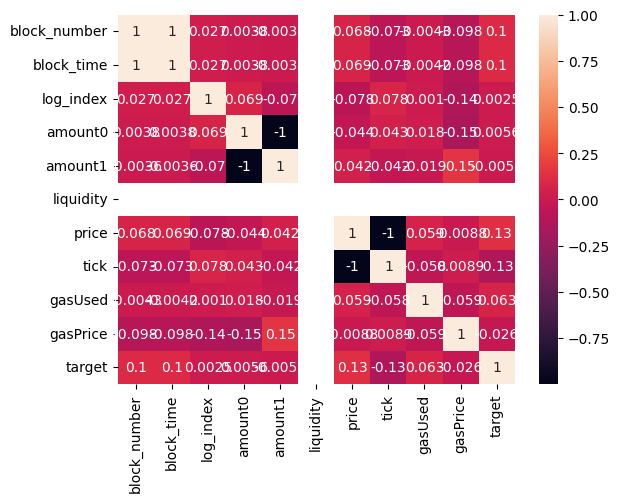

In [ ]:
import seaborn as sns
sns.heatmap(df_combined.corr(),annot=True)

In [ ]:
df_combined.columns

Index(['pool', 'block_number', 'block_hash', 'block_time', 'log_index',
       'tx_hash', 'sender', 'recipient', 'amount0', 'amount1',
       'sqrt_price_x96', 'liquidity', 'price', 'tick', 'gasUsed', 'gasPrice',
       'type_of_attack', 'target'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split

df_combined['sqrt_price_x96'] = pd.to_numeric(df_combined['sqrt_price_x96'], errors='coerce')
df_combined = df_combined.dropna()

# Split dataset into features and target variable
X = df_combined[['amount0', 'amount1', 'price', 'gasUsed', 'gasPrice','tick','liquidity','block_time','sqrt_price_x96']]
y = df_combined['type_of_attack']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#X = X.drop('pool', axis=1)




RANDOM FOREST

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define hyperparameter ranges to search over
param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1, 5),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "n_estimators": sp_randint(50, 201)}

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Perform randomized search
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=50, cv=5, random_state=42)
random_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best hyperparameters found:", random_search.best_params_)

# Train the model with the best hyperparameters
model = RandomForestClassifier(**random_search.best_params_, random_state=42)
model.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = model.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", conf_matrix)

# Generate and print the classification report
class_report = classification_report(y_test, y_pred)
print("Classification report:\n", class_report)


Best hyperparameters found: {'bootstrap': False, 'max_depth': None, 'max_features': 2, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 150}
Accuracy: 0.7643207855973814
Confusion matrix:
 [[353  39   2]
 [ 96 101   0]
 [  5   2  13]]
Classification report:
               precision    recall  f1-score   support

           B       0.78      0.90      0.83       394
           F       0.71      0.51      0.60       197
           S       0.87      0.65      0.74        20

    accuracy                           0.76       611
   macro avg       0.79      0.69      0.72       611
weighted avg       0.76      0.76      0.75       611



In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Load the trained classifier and label encoder
model = RandomForestClassifier(**random_search.best_params_, random_state=42)
le = LabelEncoder()
le.fit(df_combined['type_of_attack'])

# Split dataset into features and target variable
X = df_combined[['amount0', 'amount1', 'price', 'gasUsed', 'gasPrice','tick','liquidity','block_time','sqrt_price_x96']]
y = df_combined['type_of_attack']

# Fit the model with the training data
model.fit(X, y)

# Select a random transaction from your dataset
random_transaction = df_combined.sample(1)

# Create a dataframe containing the features of the selected transaction
transaction_features = random_transaction[['amount0', 'amount1', 'price', 'gasUsed', 'gasPrice','tick','liquidity','block_time','sqrt_price_x96']]

# Predict the attack type of the transaction
predicted_label = model.predict(transaction_features)

# Decode the predicted label using the label encoder
#predicted_attack_type = le.inverse_transform(predicted_label)

# Print the predicted attack type
print("Predicted Attack Type:", predicted_label)
# Get the actual label of the selected transaction
actual_label = random_transaction['type_of_attack'].values[0]

# Print the actual label
print("Actual Attack Type:", actual_label)



Predicted Attack Type: ['F']
Actual Attack Type: F


DECISION TREES


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Initialize the model
model = DecisionTreeClassifier(random_state=42)

# Define the hyperparameter grid to search over
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize the grid search object
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best hyperparameters found:", grid_search.best_params_)

# Train the model with the best hyperparameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = best_model.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", conf_matrix)

# Generate and print the classification report
class_report = classification_report(y_test, y_pred)
print("Classification report:\n", class_report)


Best hyperparameters found: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 5}
Accuracy: 0.6988543371522095
Confusion matrix:
 [[364  29   1]
 [146  51   0]
 [  7   1  12]]
Classification report:
               precision    recall  f1-score   support

           B       0.70      0.92      0.80       394
           F       0.63      0.26      0.37       197
           S       0.92      0.60      0.73        20

    accuracy                           0.70       611
   macro avg       0.75      0.59      0.63       611
weighted avg       0.69      0.70      0.66       611



/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Initialize the model
lr_clf = LogisticRegression(random_state=42, multi_class='multinomial', solver='lbfgs', max_iter=1000)

# Train the model
lr_clf.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = lr_clf.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print the confusion matrix
#cm = confusion_matrix(y_test, y_pred)
#print("Confusion matrix:\n", cm)


Accuracy: 0.6448445171849427


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GRADIENT BOOSTING

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the model
gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Train the model
gb_clf.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = gb_clf.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

#confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", cm)


Accuracy: 0.7397708674304418
Classification Report:
               precision    recall  f1-score   support

           B       0.74      0.92      0.82       394
           F       0.71      0.39      0.50       197
           S       0.87      0.65      0.74        20

    accuracy                           0.74       611
   macro avg       0.77      0.65      0.69       611
weighted avg       0.74      0.74      0.72       611

Confusion matrix:
 [[362  30   2]
 [120  77   0]
 [  6   1  13]]


XGBOOST

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Convert non-numeric classes to numeric classes
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# Initialize the model
xgb_clf = XGBClassifier(random_state=42)

# Train the model
xgb_clf.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = xgb_clf.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



ValueError: ignored

MULTILAYER PERCEPTRON(MLP)

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Initialize the model
mlp_clf = MLPClassifier(hidden_layer_sizes=(50,50,50), max_iter=1000)

# Train the model
mlp_clf.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = mlp_clf.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.32242225859247137


ARTIFICIAL NEURAL NETWORKS(ANN)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

# Split dataset into features and target variable
X = df_combined[['amount0', 'amount1', 'price', 'gasUsed', 'gasPrice']]
y = df_combined['type_of_attack']

# Encode the target variable using LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Perform one-hot encoding on the encoded target variable
y_train_one_hot = to_categorical(y_encoded)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_train_one_hot, test_size=0.2, random_state=42)



from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

# Define the model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(y_train_one_hot.shape[1], activation='softmax'))

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_split=0.3, epochs=50, batch_size=32)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print("Accuracy:", accuracy)


Epoch 1/50
54/54 [==============================] - 4s 7ms/step - loss: 3489562880.0000 - accuracy: 0.5386 - val_loss: 1318971392.0000 - val_accuracy: 0.6371
Epoch 2/50
54/54 [==============================] - 0s 4ms/step - loss: 2153037824.0000 - accuracy: 0.4965 - val_loss: 467955904.0000 - val_accuracy: 0.6371
Epoch 3/50
54/54 [==============================] - 0s 4ms/step - loss: 1505969152.0000 - accuracy: 0.5333 - val_loss: 663436032.0000 - val_accuracy: 0.6371
Epoch 4/50
54/54 [==============================] - 0s 4ms/step - loss: 1194451456.0000 - accuracy: 0.5421 - val_loss: 345578240.0000 - val_accuracy: 0.6371
Epoch 5/50
54/54 [==============================] - 0s 4ms/step - loss: 862400896.0000 - accuracy: 0.5263 - val_loss: 129664240.0000 - val_accuracy: 0.6371
Epoch 6/50
54/54 [==============================] - 0s 4ms/step - loss: 813490112.0000 - accuracy: 0.5006 - val_loss: 89134624.0000 - val_accuracy: 0.6371
Epoch 7/50
54/54 [==============================] - 0s 4ms/s

ROC CURVE ( NEED TO PREPROCESS DATA AND TUNE THE HYPERPARAMETERS)

In [ ]:
# from sklearn.metrics import roc_curve, auc
# from sklearn.preprocessing import label_binarize
# from itertools import cycle
# import matplotlib.pyplot as plt

# # Binarize the output
# y_test_bin = label_binarize(y_test, classes=['S', 'B', 'F'])
# n_classes = y_test_bin.shape[1]

# # Train the model
# model.fit(X_train, y_train)

# # Predict probabilities of each class
# y_score = model.predict_proba(X_test)
# labels=['S','B','F']
# # Compute ROC curve and ROC area for each class
# fpr = dict()
# tpr = dict()
# roc_auc = dict()
# for i in range(n_classes):
#     fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
#     roc_auc[i] = auc(fpr[i], tpr[i])

# # Compute micro-average ROC curve and ROC area
# fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
# roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# # Plot ROC curves for each class
# plt.figure()
# lw = 2
# colors = cycle(['blue', 'red', 'green'])
# for i, color in zip(range(n_classes), colors):
#     plt.plot(fpr[i], tpr[i], color=color, lw=lw,
#              label='ROC curve (area = %0.2f) for class %s' % (roc_auc[i], labels[i]))
# plt.plot([0, 1], [0, 1], 'k--', lw=lw)
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver operating characteristic (ROC)')
# plt.legend(loc="upper left")
# plt.show()
